In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml

In [6]:
# Load dataset (using a publicly available dataset from OpenML)
data = fetch_openml(name="UCI-student-performance-mat", version=1, as_frame=True)
df = data.frame

# Selecting relevant features (study time, past scores, absences)
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
target = 'G3'  # Final exam grade

In [7]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [8]:
df['pass'] = df['G3'] >= 10  # Creating a binary classification label
X = df[features]
y = df['pass'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79



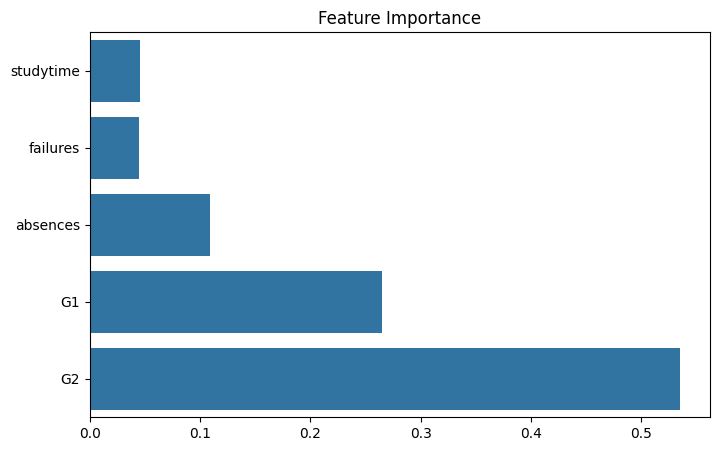

In [12]:
# Feature importance visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=features)
plt.title('Feature Importance')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml

# Load dataset (using a publicly available dataset from OpenML)
data = fetch_openml(name="UCI-student-performance-mat", version=1, as_frame=True)
df = data.frame

# Selecting relevant features (study time, past scores, absences)
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
target = 'G3'  # Final exam grade

df['pass'] = df['G3'] >= 10  # Creating a binary classification label
X = df[features]
y = df['pass'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

# Feature importance visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=features)
plt.title('Feature Importance')
plt.show()
